In [1]:
import random
import numpy as np
import pandas as pd

from MachSysS.convert_proto_timeseries import (
    convert_proto_timeseries_to_pd_dataframe,
    convert_proto_timeseries_to_pd_series,
)
from MachSysS.gymir_result_pb2 import (
    OperationProfilePoint,
    PropulsionPowerInstance,
    TimeSeriesResult,
)

2026-01-29 17:45:11,161 - MachSysS.convert_proto_timeseries - WARNING - Time in operation profile is not the same as in propulsion power.The operation profile will be interpolated to match the propulsion power time.


<Axes: >

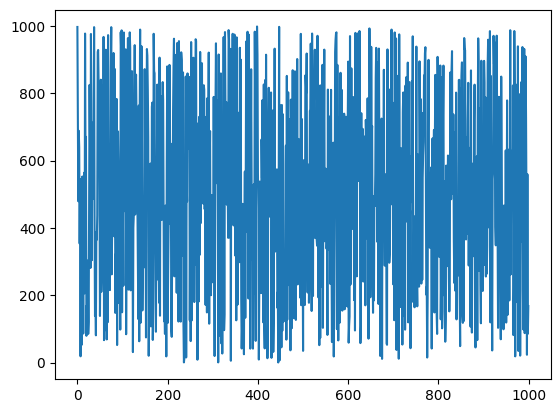

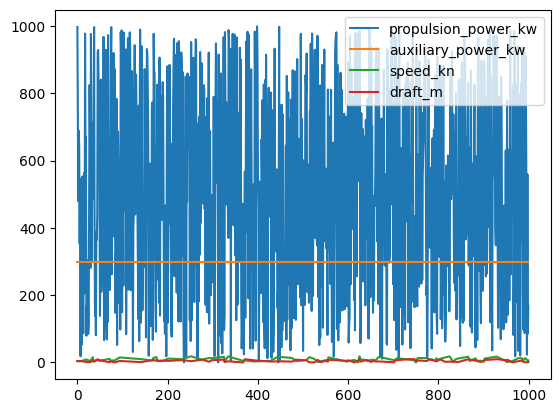

In [2]:
time_array = np.arange(0, 1000, 1)
propulsion_power_array = np.random.random(len(time_array)) * 1000
auxiliary_power = 300
speed_array = np.random.random(len(time_array)) * 20
draft_array = np.random.random(len(time_array)) * 10

timeseries_result = TimeSeriesResult()
timeseries_result.auxiliary_power_kw = auxiliary_power
for time, propulsion_power, speed_kn, draft_m in zip(
    time_array, propulsion_power_array, speed_array, draft_array
):
    timeseries_result.propulsion_power_timeseries.append(
        PropulsionPowerInstance(epoch_s=time, propulsion_power_kw=propulsion_power)
    )
    if random.random() > 0.9:
        timeseries_result.operation_profile.append(
            OperationProfilePoint(epoch_s=time, speed_kn=speed_kn, draft_m=draft_m)
        )

with open("timeseries_test.sim", "wb") as file:
    file.write(timeseries_result.SerializeToString())

time_series = convert_proto_timeseries_to_pd_series(timeseries_result)
time_series.plot()

time_series = convert_proto_timeseries_to_pd_dataframe(timeseries_result)
time_series.plot()

2026-01-29 17:45:16,236 - MachSysS.convert_proto_timeseries - WARNING - Time in operation profile is not the same as in propulsion power.The operation profile will be interpolated to match the propulsion power time.


<Axes: >

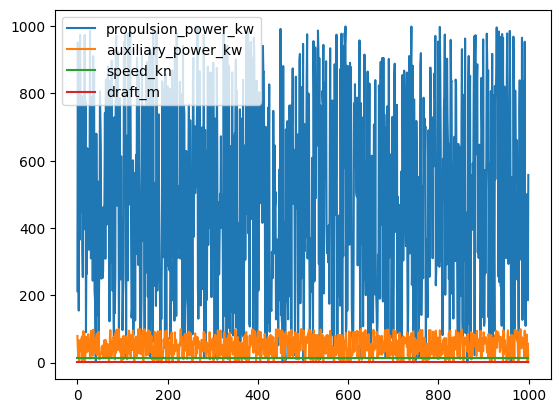

In [3]:
time_array = np.arange(0, 1000, 1)
propulsion_power_array = np.random.random(len(time_array)) * 1000
auxiliary_power_array = np.random.random(len(time_array)) * 100
speed_array = np.random.random(len(time_array)) * 20
draft_array = np.random.random(len(time_array)) * 10

timeseries_result = TimeSeriesResult()
for time, propulsion_power, auxiliary_power in zip(
    time_array, propulsion_power_array, auxiliary_power_array
):
    timeseries_result.propulsion_power_timeseries.append(
        PropulsionPowerInstance(
            epoch_s=time,
            propulsion_power_kw=propulsion_power,
            auxiliary_power_kw=auxiliary_power,
        )
    )
    if random.random() > 0.9:
        timeseries_result.operation_profile.append(
            OperationProfilePoint(epoch_s=time, speed_kn=speed_kn, draft_m=draft_m)
        )

with open("timeseries_test_.sim", "wb") as file:
    file.write(timeseries_result.SerializeToString())

time_series = convert_proto_timeseries_to_pd_dataframe(timeseries_result)
assert np.allclose(time_series["auxiliary_power_kw"].values, auxiliary_power_array)
time_series.plot()